### Compute equilibrium for the no-aggregate uncertainty KS model: DTCSCC

Proof of concept for computing the equilibrium for the model. Then, using the equilibrium aggregate capital, compute the stationary distribution (and decision rules) and plot them. This version uses a dtcscc model, thereby allowing continuous shocks.

This code does not make use of CompEcon, or rely on linear basis matrices. 

In [11]:
# Setup
import numpy as np
import scipy.sparse as spa

from dolo import *
from dolo.algos.dtcscc.time_iteration import time_iteration
import dolo.algos.dtcscc.distributions as dst
from dolo.numeric.misc import mlinspace
from dolo.numeric.discretization.quadrature import gauss_hermite_nodes

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [12]:
filename = 'incomplete_markets_dtcscc.yaml'
model = yaml_import(filename)

Nf = np.array([250, 100])

### Solve using time iteration and plot decision rules

In [7]:
# Note: time iteration need not converge monotonically
dr = time_iteration(model, with_complementarities=True, verbose=False) 

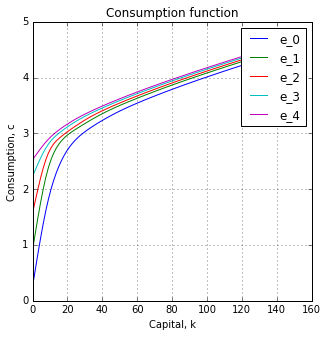

In [20]:
Nk = 100
Nftmp = np.array([Nk,1])
egrid = np.unique(dr.grid[:,1])
Ne = egrid.shape[0]

drc = np.zeros([Nk, Ne])
for i_e in range(Ne):
    sgridf = mlinspace(np.array([min(dr.grid[:,0]), egrid[i_e]]), np.array([max(dr.grid[:,0]), egrid[i_e]]),Nftmp)
    drc[:, i_e] = dr(sgridf).flatten()

%matplotlib inline

plt.figure(figsize=(5, 5))

# TECHNOLOGY SHOCK
for i_e in range(5):
    plt.plot(sgridf[:,0], drc[:,i_e],label='e_'+str(i_e))
plt.ylabel('Consumption, c')
plt.xlabel('Capital, k')
plt.title('Consumption function')
plt.legend()
plt.grid()

### Compute stationary distribution 

In [21]:
L, QT = dst.stat_dist(model, dr, Nf, Nq=7, itmaxL=5000, tolL=1e-8, verbose=True)

Iteration = 0, dist = 0.679724 

Iteration = 100, dist = 0.004467 

Iteration = 200, dist = 0.001425 

Iteration = 300, dist = 0.000388 

Iteration = 400, dist = 0.000105 

Iteration = 500, dist = 0.000029 

Iteration = 600, dist = 0.000008 

Iteration = 700, dist = 0.000002 

Iteration = 800, dist = 0.000001 

Iteration = 900, dist = 0.000000 

Iteration = 1000, dist = 0.000000 

Iteration = 1100, dist = 0.000000 



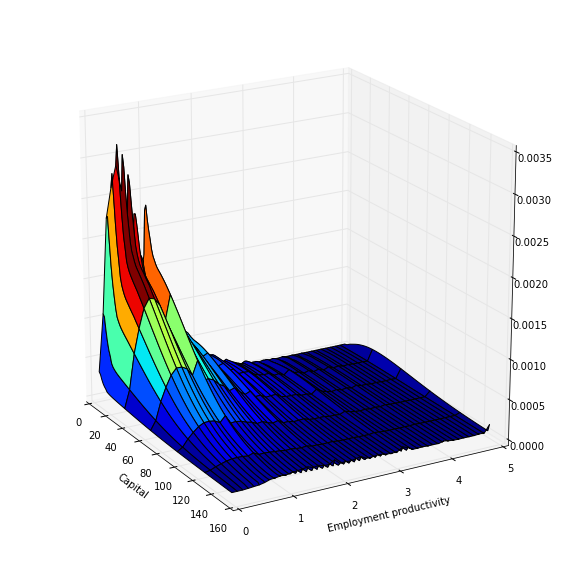

In [56]:
# 3D plot of the distribution
Nkf = Nf[0]
Nef = Nf[1]
Z = L.reshape([Nef, Nkf])
kgridf, egridf = dst.fine_grid(model, Nf)
X, Y = np.meshgrid(kgridf, egridf)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z, rstride=1, cstride=20, cmap = cm.jet)
plt.xlabel('Capital')
plt.ylabel('Employment productivity')
ax.elev = 20
ax.azim = 330

In [13]:
Kd, Ks, r = dst.supply_demand(model, Nf, numpoints=20, lower=40, upper=70, verbose=True)

    Maximum number of iterations reached


Iteration = 0

Iteration = 1

Iteration = 2

Iteration = 3

Iteration = 4

Iteration = 5

Iteration = 6

Iteration = 7

Iteration = 8

Iteration = 9

Iteration = 10

Iteration = 11

Iteration = 12

Iteration = 13

Iteration = 14

Iteration = 15



    There are multiple convergent solutions. The one with the smaller eigenvalues was selected.


Iteration = 16

Iteration = 17

Iteration = 18

Iteration = 19



(20, 65)

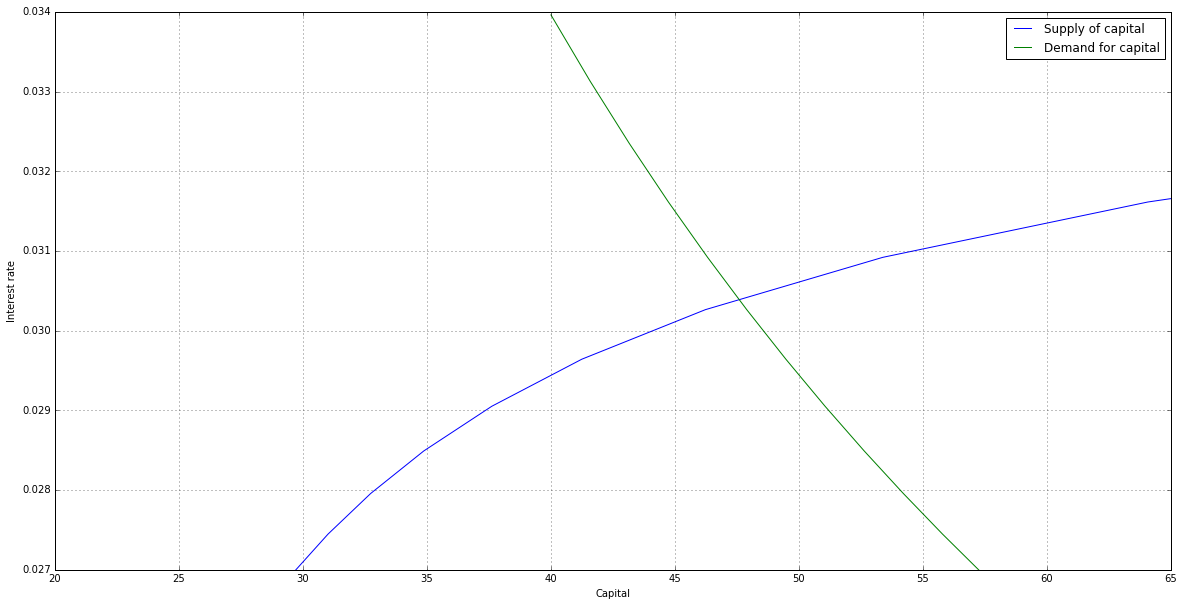

In [14]:
%matplotlib inline

fig = plt.figure(figsize=(20, 10))
plt.plot(Ks, r,label='Supply of capital')
plt.plot(Kd, r,label='Demand for capital')
# plt.plot((37.9893, 37.9893), (0.031, 0.036), 'k-', color='black', label='RA steady state capital')
plt.xlabel('Capital')
plt.ylabel('Interest rate')
plt.legend()
plt.grid()
plt.ylim(0.027, 0.034)
plt.xlim(20, 65)

### Compute the equilibrium interest rate 

Note: I find the equilibrium to be: K=47.5, however, my matlab code finds an equilibrium at K=43.5. Note, also, that the decision rules look fairly different, with a lot more of a "kink" in the dolo computed decision rules than in the matlab computed rules.

From the above supply and demand figure, I can see that the demand for capital is identical here and in the matlab code, but the asset supply curve seems to be downshifted at all levels of capital relative to the matlab code. Calibrations and number of grid points are the same, so not sure what the major difference is. 

In [4]:
K = dst.solve_eqm(model, Nf, Kinit=40, tolKeq=1e-5, verbose=True)

    Maximum number of iterations reached


Iteration = 	0: K=	38.0000  Kagg=	137.3356



    Did not converge


Iteration = 	1: K=	38.0993  Kagg=	145.2699

Iteration = 	2: K=	38.7418  Kagg=	149.9998

Iteration = 	3: K=	39.9618  Kagg=	122.8326

Iteration = 	4: K=	41.2803  Kagg=	105.2101

Iteration = 	5: K=	42.6120  Kagg=	86.2682

Iteration = 	6: K=	43.7351  Kagg=	72.9071

Iteration = 	7: K=	44.6277  Kagg=	64.5247

Iteration = 	8: K=	45.3329  Kagg=	59.1473

Iteration = 	9: K=	45.8892  Kagg=	55.5544

Iteration = 	10: K=	46.3248  Kagg=	53.0800

Iteration = 	11: K=	46.6615  Kagg=	51.3457

Iteration = 	12: K=	46.9172  Kagg=	50.1219

Iteration = 	13: K=	47.1073  Kagg=	49.2603

Iteration = 	14: K=	47.2451  Kagg=	48.6598

Iteration = 	15: K=	47.3423  Kagg=	48.2480

Iteration = 	16: K=	47.4088  Kagg=	47.9719

Iteration = 	17: K=	47.4527  Kagg=	47.7918

Iteration = 	18: K=	47.4807  Kagg=	47.6778

Iteration = 	19: K=	47.4979  Kagg=	47.6083

Iteration = 	20: K=	47.5080  Kagg=	47.5674

Iteration = 	21: K=	47.5137  Kagg=	47.5444

Iteration = 	22: K=	47.5168  Kagg=	47.5320

Iteration = 	23: K=	47.5184  Kagg=	47

### Using equilibrium aggregate capital stock, compute decision rules and stationary distribution

In [4]:
# Set model calibration to the equilibrium aggregate capital stock.
model.set_calibration(kagg=K)

# drc = time_iteration(model, with_complementarities=True, verbose=False, output_type='controls') 
mdr = time_iteration(model, with_complementarities=True, verbose=False, output_type='dr') 

In [5]:
L, QT = dst.stat_dist(model, mdr, Nkf=Nkf, verbose=False)

### Plot the equilibrium stationary distribution and decision rules

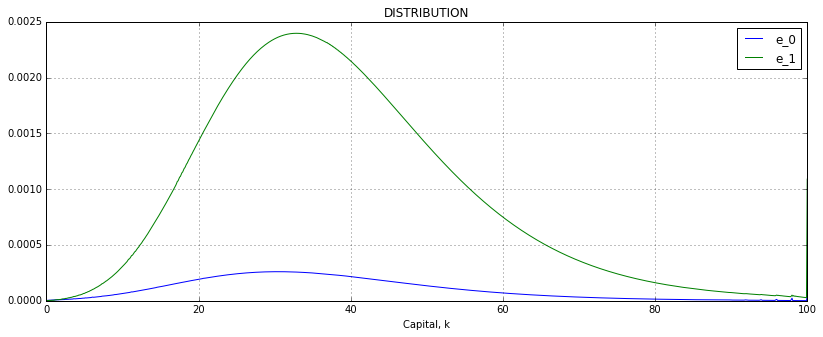

In [6]:
%matplotlib inline

plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(kgridf, L[:Nkf],label='e_0')
plt.plot(kgridf, L[Nkf:],label='e_1')
plt.xlabel('Capital, k')
plt.title('DISTRIBUTION')
plt.legend()
plt.grid()

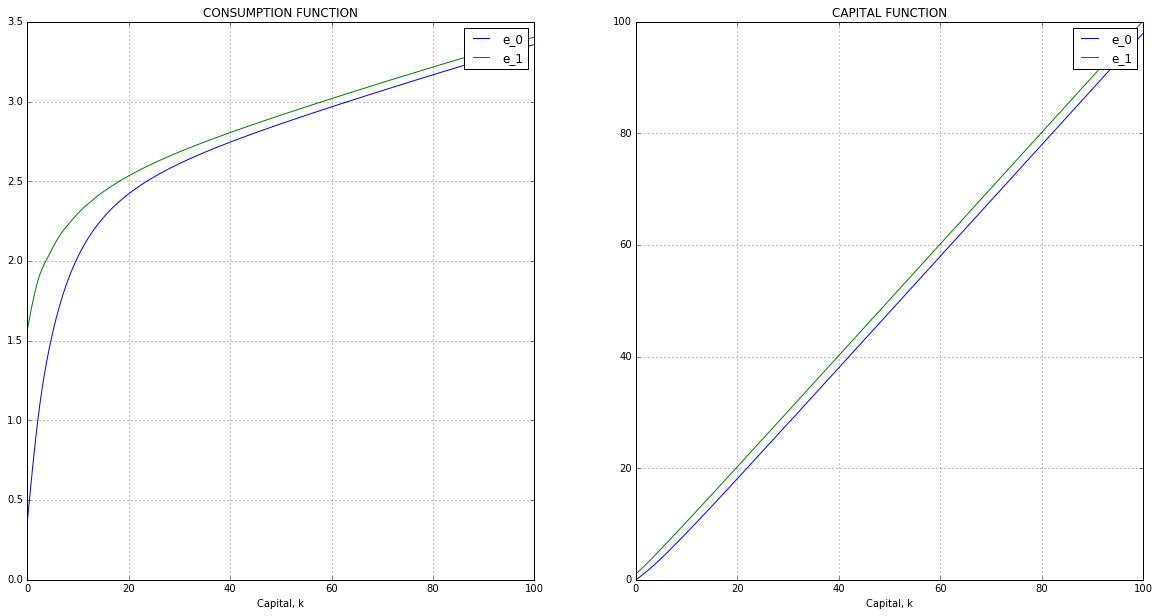

In [9]:
# Get kprime and consumption from the markov decision rule

kprimef = dst.mdr_to_sprime(model, mdr, Nkf)
mdrc = np.zeros([Nkf, Ne])
for i_m in range(Ne):
    mdrc[:, i_m] = mdr(i_m, kgridf.reshape(-1,1)).flatten()

# Plot controls

%matplotlib inline
kgrid = mdr.grid

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.plot(kgridf, mdrc[:,0],label='e_0')
plt.plot(kgridf, mdrc[:,1],label='e_1')
plt.xlabel('Capital, k')
plt.title('CONSUMPTION FUNCTION')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(kgridf, kprimef[:Nkf],label='e_0')
plt.plot(kgridf, kprimef[Nkf:],label='e_1')
plt.xlabel('Capital, k')
plt.title('CAPITAL FUNCTION')
plt.legend()
plt.grid()

### Compute supply and demand curves using stat_dist function

In [ ]:
Kd, Ks, r = dst.supply_demand(model, Nkf=1000, numpoints=20, lower=37, upper=40, verbose=True)

(20, 60)

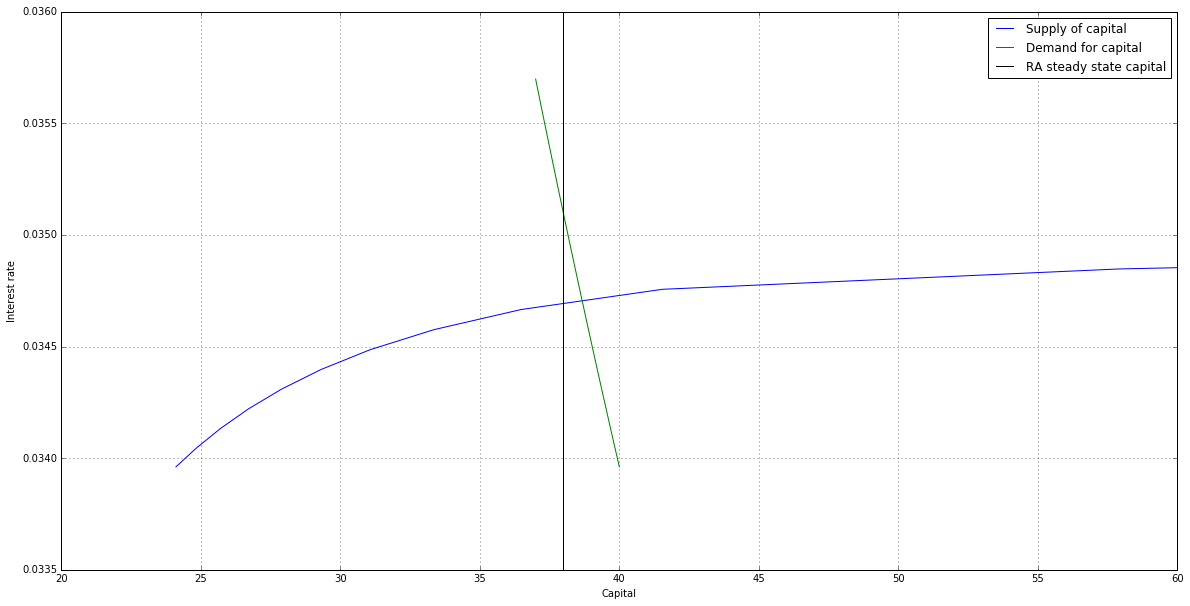

In [4]:
%matplotlib inline

fig = plt.figure(figsize=(20, 10))
plt.plot(Ks, r,label='Supply of capital')
plt.plot(Kd, r,label='Demand for capital')
plt.plot((37.9893, 37.9893), (0.031, 0.036), 'k-', color='black', label='RA steady state capital')
plt.xlabel('Capital')
plt.ylabel('Interest rate')
plt.legend()
plt.grid()
plt.ylim(0.0335, 0.036)
plt.xlim(20, 60)

#### Create a function that takes transition back to control

For models in which we can use the $s_{t+1}$ trick, need to create a function that takes this transition rule back to the control. 